loading data start!


[2020-09-18 01:24:57] - __init__.py[line:126] - INFO: Successfully Reload: /home/tione/notebook/huawei/cached_data/CACHE_EMB_DICT_8_1_8_uid_communication_onlinerate_w2v.pkl
[2020-09-18 01:24:57] - __init__.py[line:126] - INFO: Successfully Reload: /home/tione/notebook/huawei/cached_data/CACHE_EMB_DICT_8_1_8_uid_slot_id_w2v.pkl
[2020-09-18 01:24:58] - __init__.py[line:126] - INFO: Successfully Reload: /home/tione/notebook/huawei/cached_data/CACHE_EMB_DICT_8_1_8_uid_net_type_w2v.pkl
[2020-09-18 01:24:58] - __init__.py[line:126] - INFO: Successfully Reload: /home/tione/notebook/huawei/cached_data/CACHE_EMB_DICT_8_1_8_uid_device_name_w2v.pkl
[2020-09-18 01:25:04] - __init__.py[line:126] - INFO: Successfully Reload: /home/tione/notebook/huawei/cached_data/CACHE_data_step_3_features_0_0917.pkl
[2020-09-18 01:25:11] - __init__.py[line:126] - INFO: Successfully Reload: /home/tione/notebook/huawei/cached_data/CACHE_data_step_3_features_1_0917.pkl
[2020-09-18 01:25:18] - __init__.py[line:126] - 

(8601298, 304)
(8601298, 1124)
loading data finish!
1119
['task_id', 'adv_id', 'creat_type_cd', 'adv_prim_id', 'dev_id', 'inter_type_cd', 'slot_id', 'spread_app_id', 'tags', 'app_first_class', 'app_second_class', 'age', 'city', 'city_rank', 'device_name', 'device_size', 'career', 'gender', 'net_type', 'residence', 'his_app_size', 'his_on_shelf_time', 'app_score', 'emui_dev', 'list_time', 'device_price', 'up_life_duration', 'up_membership_grade', 'membership_life_duration', 'consume_purchase', 'communication_avgonline_30d', 'indu_name', 'cmr_0', 'cmr_1', 'cmr_2', 'cmr_3', 'cmr_4', 'cmr_5', 'cmr_6', 'cmr_7', 'cmr_8', 'cmr_9', 'cmr_10', 'cmr_11', 'cmr_12', 'cmr_13', 'cmr_14', 'cmr_15', 'cmr_16', 'cmr_17', 'cmr_18', 'cmr_19', 'cmr_20', 'cmr_21', 'cmr_22', 'cmr_23', 'cmr_None', 'task_id_count', 'task_id_pt_d_count', 'adv_id_count', 'adv_id_pt_d_count', 'creat_type_cd_count', 'creat_type_cd_pt_d_count', 'adv_prim_id_count', 'adv_prim_id_pt_d_count', 'dev_id_count', 'dev_id_pt_d_count', 'inte

0:	test: 0.7911045	best: 0.7911045 (0)	total: 1.27s	remaining: 3h 31m 12s
1000:	test: 0.8247371	best: 0.8247408 (996)	total: 18m 3s	remaining: 2h 42m 23s


[2020-09-18 02:26:41] - utils.py[line:126] - INFO: Note: detected 80 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
[2020-09-18 02:26:41] - utils.py[line:129] - INFO: Note: NumExpr detected 80 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[2020-09-18 02:26:41] - utils.py[line:141] - INFO: NumExpr defaulting to 8 threads.


AUC Score (Valid): 0.824822


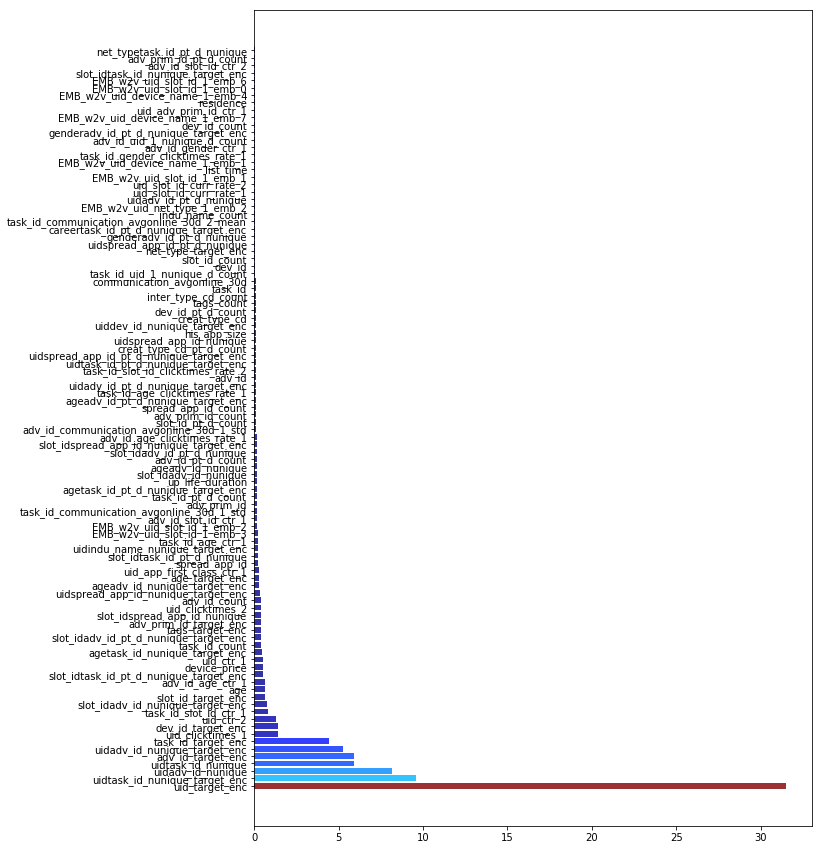

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	total: 1.29s	remaining: 27m 57s
100:	total: 2m 1s	remaining: 24m 5s
200:	total: 4m	remaining: 21m 56s
300:	total: 6m 2s	remaining: 20m 2s
400:	total: 7m 58s	remaining: 17m 53s
500:	total: 9m 54s	remaining: 15m 48s
600:	total: 11m 53s	remaining: 13m 49s
700:	total: 13m 46s	remaining: 11m 46s
800:	total: 15m 41s	remaining: 9m 46s
900:	total: 17m 34s	remaining: 7m 47s
1000:	total: 19m 27s	remaining: 5m 48s
1100:	total: 21m 21s	remaining: 3m 51s
1200:	total: 23m 10s	remaining: 1m 54s
1299:	total: 25m 1s	remaining: 0us


In [1]:
import pandas as pd
import seaborn as sns
from catboost import CatBoostClassifier
from matplotlib import pyplot as plt
from tqdm import tqdm
import time
import gc
import numpy as np
from scipy.stats import entropy
from gensim.models import Word2Vec
from sklearn.metrics import *
from base import Cache
import joblib

import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('precision', 5)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('max_colwidth', 200)
pd.set_option('display.width', 5000)

def reduce_mem(df, use_float16=False):
    start_mem = df.memory_usage().sum() / 1024 ** 2
    tm_cols = df.select_dtypes('datetime').columns
    for col in df.columns:
        if col in tm_cols:
            continue
        col_type = df[col].dtypes
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type).find('int') > -1:
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(
                        np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(
                        np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(
                        np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(
                        np.int64).max:
                    df[col] = df[col].astype(np.int64)
            elif str(col_type).find('float') > -1:
                if use_float16 and c_min > np.finfo(
                        np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(
                        np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('{:.2f} Mb, {:.2f} Mb ({:.2f} %)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

print('loading data start!')
# w2v 特征
df_w2v1 = Cache.reload_cache('CACHE_EMB_DICT_8_1_8_uid_communication_onlinerate_w2v.pkl')
df_w2v2 = Cache.reload_cache('CACHE_EMB_DICT_8_1_8_uid_slot_id_w2v.pkl')
df_w2v3 = Cache.reload_cache('CACHE_EMB_DICT_8_1_8_uid_net_type_w2v.pkl')
df_w2v4 = Cache.reload_cache('CACHE_EMB_DICT_8_1_8_uid_device_name_w2v.pkl')
# step3 特征
df_window0 = Cache.reload_cache('CACHE_data_step_3_features_0_0917.pkl')
df_window1 = Cache.reload_cache('CACHE_data_step_3_features_1_0917.pkl')
df_window2 = Cache.reload_cache('CACHE_data_step_3_features_2_0917.pkl')
# 基础特征+编码特征
df = Cache.reload_cache('CACHE_data_step2_feature_0917.pkl')
del df['communication_onlinerate'],df['level_0']
gc.collect()
print(df.shape)
df = df.merge(df_window0,on='index',how='left')
df = df.merge(df_window1,on='index',how='left')
df = df.merge(df_window2,on='index',how='left')

df = df.merge(df_w2v1,on='index',how='left')
df = df.merge(df_w2v2,on='index',how='left')
df = df.merge(df_w2v3,on='index',how='left')
df = df.merge(df_w2v4,on='index',how='left')
print(df.shape)
df['label'] = df['label'].fillna(-1).astype(int)
print('loading data finish!')


# #线下数据集的切分
X_train = df[df["pt_d"]<7].copy()
y_train = X_train["label"].astype('int32')
X_valid = df[df["pt_d"]==7]
y_valid = X_valid["label"].astype('int32')
test_df = df[df["pt_d"]==8].copy()
# 筛选特征
drop_fea = ['pt_d','label','communication_onlinerate','index','uid','id']
feature= [x for x in X_train.columns if x not in drop_fea]
print(len(feature))
print(feature)

#线下验证
cate_fea = []
clf = CatBoostClassifier(iterations=10000, depth=6,learning_rate=0.1, loss_function='Logloss',cat_features=cate_fea,thread_count=80
                        ,verbose=True,eval_metric='AUC',counter_calc_method='Full',metric_period=1000)
clf.fit(
    X_train[feature], y_train.astype('int32'),
    eval_set=[(X_valid[feature],y_valid.astype('int32'))],
    early_stopping_rounds=200,
    verbose=True,
    use_best_model=True,
)
joblib.dump(clf,'./models/ctb_local0918.pkl')
y_predprob = clf.predict_proba(X_valid[feature])[:, 1] 

y_pre = clf.predict_proba(test_df[feature])[:, 1]  
auc_score =roc_auc_score(y_valid, y_predprob)
print("AUC Score (Valid): %f" % auc_score)

#查看模型的特征重要性
import matplotlib.pyplot as plt 
from matplotlib import cm
%matplotlib inline
score = pd.DataFrame()
score['fea_name'] = clf.feature_names_
score['fea']=clf.feature_importances_
score = score.sort_values(['fea'], ascending=False)
temp = pd.DataFrame()
temp = score[:100]
color = cm.jet(temp['fea']/temp['fea'].max())
plt.figure(figsize=(10, 15))
plt.barh(temp['fea_name'],temp['fea'],height =0.8,color=color,alpha=0.8)
plt.show()

# 线上提交的模型训练
clf1 = CatBoostClassifier(iterations=clf.best_iteration_+5, depth=6,learning_rate=0.1, loss_function='Logloss',cat_features=cate_fea,thread_count=80
                        ,verbose=True,eval_metric='AUC',counter_calc_method='Full',metric_period=100)# clf.best_iteration_
clf1.fit(
    df[df["pt_d"]<=7][feature], df[df["pt_d"]<=7]['label'].astype('int32'),
    verbose=True,
    use_best_model=True,
)
joblib.dump(clf1,'./models/ctb_0918pkl')
y_pre = clf1.predict_proba(df[df["pt_d"]==8][feature])[:, 1]    

res = pd.DataFrame()
res['id'] = df[df["pt_d"]==8]['id'].astype('int32')
res['probability'] = y_pre
res.to_csv('./subs/ctb_0918_{}.csv'.format(auc_score),index = False)

# check psi

In [24]:
features_use = list(score.head(300)['fea_name'])
def get_psi(dfL, features):
    '''

    :param dfL:
    :param features:
    :param now: new
    :param match: base
    :return:
    '''
    # 算psi
    detailPSI = []
    for i in tqdm(features):
        if dfL[i].nunique()>30 and str(dfL[i].dtype).find('float')>-1:
            dfL['bin'] = pd.qcut(dfL[i], 10, precision=3, duplicates='drop').astype(str)
            dfLbase = dfL.query('pt_d==7')[['index','bin']].copy()  # 01
            seti = dfL.query('pt_d==8')[['index','bin']].copy()  # 02
            dfLbase.columns = ['index',i]
            seti.columns=['index',i]
        elif dfL[i].nunique()<=30:
            dfLbase = dfL.query('pt_d==7')[['index',i]].copy()  # 01
            seti = dfL.query('pt_d==8')[['index',i]].copy()  # 02
        else:
            continue
        gp0all = dfLbase.groupby(i)['index'].count().reset_index()
        gp0all.columns = ['bin', 'total_train']
        gp1all = seti.groupby(i)['index'].count().reset_index()
        gp1all.columns = ['bin', 'total_oot']
        gp = pd.merge(gp0all, gp1all, on='bin', how='left')
        gp['total_train'] = gp['total_train'] / dfLbase.shape[0]
        gp['total_oot'] = gp['total_oot'] / seti.shape[0]
        gp['PSI'] = gp.apply(
            lambda x: (x['total_oot'] - x['total_train']) * np.log(
                (x['total_oot'] + 0.000000001) / (x['total_train'] + 0.000000001)), axis=1)
        gp['varName'] = i
        detailPSI.append(gp)
    detailPSI = pd.concat(detailPSI)
    resultPSI_stat = detailPSI.groupby('varName')['psi'].sum().reset_index()
    return detailPSI, resultPSI_stat
seti = df.query('pt_d==7 or pt_d==8').copy()
detailPSI, resultPSI_stat = get_psi(seti, features_use)

  0%|          | 0/300 [00:42<?, ?it/s]


TypeError: can't set attributes of built-in/extension type 'set'